
**Model Training** - The purpose of this assignment is to apply your knowledge of machine learning to **two** different datasets. For each dataset, you will train a model to achieve a reasonable performance. You may use trial and error process or search strategies (e.g., Grid search) to fine-tune your model. If you are making any choice or trade-off, document it in your notebook. Documentations should be added as a text cell to your notebook.

**Presentation** - Create a summary of your findings and present it in a format of your choice (short video, short report, a few presentation slides, etc.)

**Reflection** - Finally, add your contribution statement and self assessment to your notebook.


## Mental Disorder Dataset

Mental Health is an important issue. It must be taken seriously and treated appropriately. Using historical data collected from people diagnosed with Mania Bipolar Disorder (Bipolar Type-1), Depressive Bipolar Disorder (Bipolar Type-2), Major Depressive Disorder, and Normal Individuals, your task is to build a model that can detect the type of mental disorder. The Normal category refers to the individuals who may have minor mental problems, but they differ from those suffering from Major Depressive Disorder and Bipolar Disorder.

Your model will be used in as a tool that will help psychiatrists in their decision making process.

A collection of 120 Psychology Patients with 17 Essential Symptoms is prepared.
The dataset contains the 17 essential symptoms psychiatrists use to diagnose the described disorders. The behavioral symptoms are considered the levels of patients Sadness, Exhaustness, Euphoric, Sleep disorder, Mood swings, Suicidal thoughts, Anorexia, Anxiety, Try-explaining, Nervous breakdown, Ignore & Move-on, Admitting mistakes, Overthinking, Aggressive response, Optimism, Sexual activity, and Concentration.


# Your Tasks

This is a classification problem test

### Install and import dependencies

In [250]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download dataset

In [251]:
dataframe = pd.read_csv("Mental-Health.csv")

In [252]:
dataframe.describe

<bound method NDFrame.describe of     Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          

In [253]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [254]:
dataframe.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


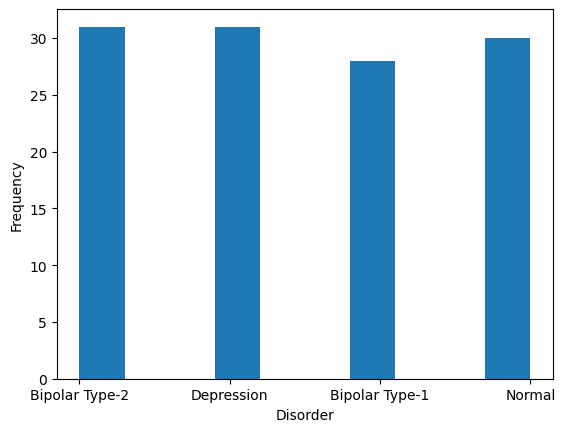

In [255]:
plt.hist(dataframe["Expert Diagnose"])
plt.xlabel("Disorder")
plt.ylabel("Frequency")

plt.show()

## Data Cleaning

We noticed that all the entries for patient column the name for each patient is spelled incorrectly, so instead of fixing this we decided to drop the column entirely beacuse this column won't help during the module traing on during our target column(Expert Diagnose)

In [256]:
dataframe = dataframe.drop(columns=['Patient Number'])
dataframe

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


We noticed that during our data exploration that patient 1 had space in one a its value, so we decided to remove leading and trailing white space for every column

In [257]:
# removes leading and trailing whitespace
dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)
dataframe.replace(['YES', 'NO'],[1, 0], inplace=True)
dataframe


C:\Users\PC\AppData\Local\Temp\ipykernel_15864\1238774381.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\PC\AppData\Local\Temp\ipykernel_15864\1238774381.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(['YES', 'NO'],[1, 0], inplace=True)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2 From 10,5 From 10,3 From 10,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,0,1,1,0,1,1,1,0,1,1,7 From 10,7 From 10,7 From 10,Depression


Just numerizing the data here

In [258]:
clean_df = dataframe.iloc[:, 14:17]


def extract_first_value(entry):
    return entry.split()[0]

clean_df = clean_df.applymap(extract_first_value)

dataframe.drop(columns=['Sexual Activity','Concentration','Optimisim'], inplace=True)


dataframe = pd.concat([dataframe,clean_df],axis=1)

column_to_move = dataframe['Expert Diagnose']

dataframe.drop(columns=['Expert Diagnose'], inplace=True)


dataframe['Expert Diagnose'] = column_to_move

dataframe


C:\Users\PC\AppData\Local\Temp\ipykernel_15864\4088583680.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_df = clean_df.applymap(extract_first_value)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,0,1,1,0,1,1,1,0,1,1,7,7,7,Depression


Figure out how many different Expert Diagnose categories there is

In [259]:
dataframe["Expert Diagnose"].value_counts()

Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

We store our target column but make sure to delete it in training process

In [260]:
target = dataframe["Expert Diagnose"]
data = dataframe.drop("Expert Diagnose", axis = 1)

In [261]:
from imblearn.under_sampling import RandomUnderSampler
# we could undersampler or oversampler here, I just decided to do underSampler , we might have to over sample because Bipolar Type-2 and Depression are 31. Not exactly sure!
sampler = RandomUnderSampler(random_state=0)

X_under, y_under = sampler.fit_resample(data, target)
data = X_under
target = y_under

In [262]:
target.value_counts()

Expert Diagnose
Bipolar Type-1    28
Bipolar Type-2    28
Depression        28
Normal            28
Name: count, dtype: int64

In [263]:
data.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7
6,Seldom,Usually,Seldom,Sometimes,1,1,1,0,1,1,0,1,1,1,7,2,9
11,Seldom,Sometimes,Sometimes,Usually,1,1,1,0,1,1,0,1,0,1,8,4,9
15,Sometimes,Sometimes,Sometimes,Sometimes,1,0,1,0,1,1,0,0,0,1,6,4,6
17,Usually,Sometimes,Most-Often,Sometimes,1,0,0,0,1,1,0,1,0,1,6,2,3


## Create a Test Set

In [264]:
target.value_counts()

Expert Diagnose
Bipolar Type-1    28
Bipolar Type-2    28
Depression        28
Normal            28
Name: count, dtype: int64

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [266]:
y_train.value_counts()

Expert Diagnose
Normal            25
Depression        23
Bipolar Type-1    21
Bipolar Type-2    20
Name: count, dtype: int64

In [267]:
y_test.value_counts()

Expert Diagnose
Bipolar Type-2    8
Bipolar Type-1    7
Depression        5
Normal            3
Name: count, dtype: int64

## Prepare the Data for Machine Learning Algorithms

In [268]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

num_attribs = ["Mood Swing", "Suicidal thoughts", "Anorxia", "Authority Respect",
               "Try-Explanation", "Aggressive Response", "Ignore & Move-On", "Nervous Break-down","Admit Mistakes","Overthinking",'Sexual Activity','Concentration','Optimisim']
cat_attribs = ["Sadness","Euphoric","Exhausted","Sleep dissorder"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("normalization", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [269]:
X_train_prepared = full_pipeline.fit_transform(X_train)

## Select and Train a Model

This gives me all sklearns that are classification

In [270]:
from sklearn.utils import all_estimators

# Get all the estimators from sklearn
estimators = all_estimators(type_filter='classifier')

# List all the classifier names
classifier_names = [name for name, _ in estimators]

print("List of classification modules available in sklearn:")
for classifier_name in sorted(classifier_names):
    print(classifier_name)

List of classification modules available in sklearn:
AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
OutputCodeClassifier
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RadiusNeighborsClassifier
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


In [271]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

list_modules = [RandomForestClassifier,DecisionTreeClassifier,LinearSVC,LogisticRegression,BaggingClassifier,DummyClassifier,GradientBoostingClassifier,MLPClassifier]

results_df = []

for m in list_modules:
  clf = m(random_state=42)

  clf.fit(X_train_prepared, y_train)


  scorers = {
      'precision': make_scorer(precision_score, average='macro'),
      'recall': make_scorer(recall_score, average='macro'),
      'f1': make_scorer(f1_score, average='macro')
  }

  # Perform cross-validation with multiple scoring metrics doing this 5 iterations
  scores = cross_validate(clf, X_train_prepared, y_train , cv=5, scoring=scorers)


  # Store the results in a DataFrame
  #When you use make_scorer to  define custom scorers th default named prefixes is test_ + the key name from scorers dictionary
  #The reason I did mean for each metric is because I want to see
  df = pd.DataFrame({
      'precision': scores['test_precision'].mean() * 100,
      'Recall': scores['test_recall'].mean() * 100,
      'F1-score': scores['test_f1'].mean() * 100
  }, index=[m])

  results_df.append(df)

# Concatenate all DataFrames into one large DataFrame
combined_df = pd.concat(results_df)

combined_df
#KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,StackingClassifier,CalibratedClassifierCV

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_res

,precision,Recall,F1-score
<class 'sklearn.ensemble._forest.RandomForestClassifier'>,NaN,NaN,NaN
<class 'sklearn.tree._classes.DecisionTreeClassifier'>,NaN,NaN,NaN
<class 'sklearn.svm._classes.LinearSVC'>,NaN,NaN,NaN
<class 'sklearn.linear_model._logistic.LogisticRegression'>,NaN,NaN,NaN
<class 'sklearn.ensemble._bagging.BaggingClassifier'>,NaN,NaN,NaN
<class 'sklearn.dummy.DummyClassifier'>,NaN,NaN,NaN
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>,NaN,NaN,NaN
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>,NaN,NaN,NaN


In [272]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
#from sklearn.calibration import CalibratedClassifierCV
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


list_modules = [RandomForestClassifier,DecisionTreeClassifier,LinearSVC,LogisticRegression,BaggingClassifier,DummyClassifier,GradientBoostingClassifier,MLPClassifier]

for m in list_modules:
  #clf_2 = DecisionTreeClassifier(random_state=42)
  clf_2 = m(random_state=42)

  clf_2 = clf_2.fit(X_train_prepared, y_train)

  clf_2_scores = cross_val_score(clf_2, X_train_prepared, y_train, cv=5)
  print(pd.Series(clf_2_scores).describe())
  print("\n")


count    5.000000
mean     0.900000
std      0.072436
min      0.833333
25%      0.833333
50%      0.888889
75%      0.944444
max      1.000000
dtype: float64


count    5.000000
mean     0.799346
std      0.091696
min      0.722222
25%      0.722222
50%      0.777778
75%      0.833333
max      0.941176
dtype: float64


count    5.000000
mean     0.776471
std      0.076278
min      0.666667
25%      0.777778
50%      0.777778
75%      0.777778
max      0.882353
dtype: float64


count    5.000000
mean     0.833333
std      0.117851
min      0.722222
25%      0.722222
50%      0.833333
75%      0.888889
max      1.000000
dtype: float64


count    5.000000
mean     0.832680
std      0.086814
min      0.722222
25%      0.777778
50%      0.833333
75%      0.888889
max      0.941176
dtype: float64


count    5.000000
mean     0.281046
std      0.007307
min      0.277778
25%      0.277778
50%      0.277778
75%      0.277778
max      0.294118
dtype: float64




C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PC\AppD

count    5.000000
mean     0.820915
std      0.070976
min      0.722222
25%      0.777778
50%      0.833333
75%      0.882353
max      0.888889
dtype: float64




C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


count    5.000000
mean     0.820915
std      0.059113
min      0.722222
25%      0.833333
50%      0.833333
75%      0.833333
max      0.882353
dtype: float64




C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Selected the RandomForestClassifier model since it provided the highest F-score as shown above

In [273]:
from sklearn.ensemble import RandomForestClassifier

clf_3 = RandomForestClassifier(random_state=42)

forest_rmses = cross_val_score(clf_3, X_train_prepared, y_train, cv=5)
pd.Series(forest_rmses).describe()

count    5.000000
mean     0.900000
std      0.072436
min      0.833333
25%      0.833333
50%      0.888889
75%      0.944444
max      1.000000
dtype: float64

## Fine-Tune Your Model

## Grid Search

In [274]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [4, 6, 8]
     },

    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2,3,4]
     },
]
grid_search = GridSearchCV(clf_3, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [275]:
grid_search.best_estimator_

RandomForestClassifier(max_features=6, n_estimators=30, random_state=42)

In [276]:
final_model = grid_search.best_estimator_

feature_importances = final_model.feature_importances_ #caclculates feature importance, features with higher values result in a bigger influence in making decisions
feature_importances.round(4)

array([0.1735, 0.0674, 0.0237, 0.0515, 0.0065, 0.0198, 0.0276, 0.0189,
       0.0136, 0.0202, 0.1117, 0.0405, 0.1148, 0.0349, 0.0151, 0.0301,
       0.0248, 0.0052, 0.0109, 0.0163, 0.0359, 0.0182, 0.01  , 0.0355,
       0.0109, 0.0037, 0.0278, 0.0102, 0.0206])

In [277]:
X_test_prepared = full_pipeline.transform(X_test)

y_predictions = final_model.predict(X_test_prepared)

In [278]:
y_predictions

array(['Bipolar Type-2', 'Depression', 'Bipolar Type-1', 'Bipolar Type-1',
       'Bipolar Type-2', 'Depression', 'Bipolar Type-1', 'Bipolar Type-2',
       'Bipolar Type-1', 'Bipolar Type-2', 'Normal', 'Bipolar Type-2',
       'Depression', 'Normal', 'Bipolar Type-1', 'Bipolar Type-1',
       'Bipolar Type-2', 'Depression', 'Normal', 'Normal',
       'Bipolar Type-2', 'Normal', 'Bipolar Type-2'], dtype=object)

In [279]:
y_predictions_prob = final_model.predict_proba(X_test_prepared)
y_predictions_prob*100

array([[ 3.33333333, 80.        , 13.33333333,  3.33333333],
       [ 0.        , 20.        , 73.33333333,  6.66666667],
       [40.        , 33.33333333, 26.66666667,  0.        ],
       [50.        , 36.66666667,  6.66666667,  6.66666667],
       [10.        , 66.66666667, 10.        , 13.33333333],
       [ 0.        , 13.33333333, 86.66666667,  0.        ],
       [33.33333333, 26.66666667,  6.66666667, 33.33333333],
       [33.33333333, 36.66666667,  3.33333333, 26.66666667],
       [53.33333333, 16.66666667, 13.33333333, 16.66666667],
       [16.66666667, 60.        , 20.        ,  3.33333333],
       [13.33333333, 20.        , 23.33333333, 43.33333333],
       [ 3.33333333, 76.66666667, 20.        ,  0.        ],
       [ 0.        , 10.        , 86.66666667,  3.33333333],
       [ 6.66666667,  6.66666667, 10.        , 76.66666667],
       [76.66666667,  0.        ,  0.        , 23.33333333],
       [56.66666667, 16.66666667, 16.66666667, 10.        ],
       [ 6.66666667, 76.

In [280]:
print("Bipolar Type-2", str(len(y_test[y_test=="Bipolar Type-2"])))
print("Depression", str(len(y_test[y_test=="Depression"])))
print("Bipolar Type-1", str(len(y_test[y_test=="Bipolar Type-1"])))
print("Normal", str(len(y_test[y_test=="Normal"])))

Bipolar Type-2 8
Depression 5
Bipolar Type-1 7
Normal 3


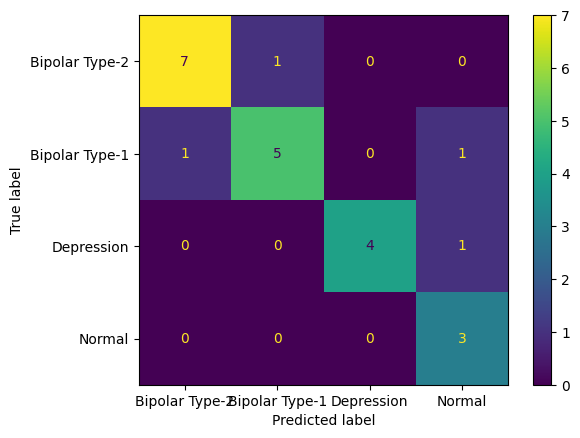

In [286]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predictions, labels=["Bipolar Type-2", "Bipolar Type-1", "Depression","Normal"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Bipolar Type-2", "Bipolar Type-1", "Depression","Normal"])
disp.plot()

## Wine Quality dataset

The [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of a set of 11 input parameters (acidity, sugar content, alcohol level, etc) and a single output ("quality" as assessed by expert tasters). The white wine dataset, with a total of 4898 samples, is selected for this problem.

The wine quality dataset is larger than the mental health disrder datasets, there are a number of challenges to overcome:
- Not all inputs are necessarily relevant, and some may be correlated. Part of your experimentation should be determining which inputs to use.
- The dataset is not pre-split into test/train/validation sets.
- The input parameters are not on the same scale, so they require preprocessing.
- The output can be treated as either a regression problem (predict a continuous value from 0 to 9) or as a classification problem.
- The output classes are unbalanced. You will have to address this through appropriate choice of loss metric or resampling.

Train a regression model OR a 3-class classifier (low, medium, high quality). To train a 3-class classifier, you must re-label the data. You may choose the cut-off points for each class.

This is a classification or regression problem

In [282]:
white_wine_csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(white_wine_csv, sep=';')

# Inspect the dataset
wine_data.info()
wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Note that the wine quality dataset is **unbalanced**, with many more samples in the "medium" quality categories than at the extremes.

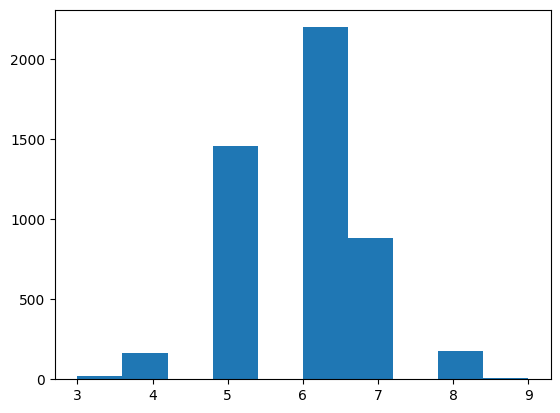

In [283]:
plt.hist(wine_data['quality'], bins=10)
plt.show()

## Reflection

**Contribution statement**: Briefly explain the contribution of each member to the assignment.



**Self assessment**: In your opinion, what are the deficiencies in your work that need to be improved?

# Marking Rubric



The following table provides a summary of how your assignment will be marked. Your results will not be ranked against each other; what counts is reasonable choices and description of your thought processes.

<table>
<tr>
<th>Item</th>
<th>Points</th>
</tr>

<tr>
<td>The training process for dataset 1</td>
<td>20</td>
</tr>

<tr>
<td>The training process for dataset 2</td>
<td>24</td>
</tr>

<tr>
<td>Documentation of the process and choices made </td>
<td>20</td>
</tr>

<tr>
<td>Overall code quality</td>
<td>10</td>
</tr>

<tr>
<td>Presentation</td>
<td>16</td>
</tr>

<tr>
<td>Reflection</td>
<td>10</td>
</tr>


<tr>
<td><b>Total:</b></td>
<td><b>100</b></td>
</tr>

</table>